In [7]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
def com_distance_to_pmf(file, bins):
    ''' Load COM distance as a function of MC steps and calculate potential of mean forece (PMF) '''
    p, r = np.histogram(np.loadtxt(file), bins=bins)
    r = r[1:] / 2 + r[0:-1] / 2
    dr = r[1] - r[0]
    r_max = r[-1]
    gofr = p / p.sum() * r_max / dr # g(r)
    pmf = -np.log(gofr)             # w(r)/kT
    print(f"r_min = {r[0]}, r_max = {r_max} Å, dr = {dr} Å")
    return r, pmf

r_min = 3.0707949999999995, r_max = 59.064205 Å, dr = 0.5655900000000003 Å


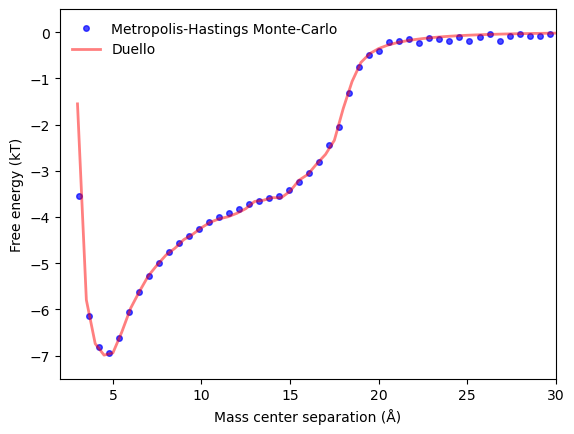

In [11]:
r, pmf = com_distance_to_pmf("com_distance.dat.gz", bins=100)
plt.plot(r, pmf -3.9, 'bo', lw=1, label="Metropolis-Hastings Monte-Carlo", alpha=0.7, ms=4)

r, pmf = np.loadtxt("pmf.dat", usecols=[0,1], unpack=True)
plt.plot(r, pmf, label="Duello", lw=2, alpha=0.5, color='red')

plt.ylabel("Free energy (kT)")
plt.xlabel("Mass center separation (Å)")
plt.legend(loc=0, frameon=False)
plt.xlim(2, 30)
plt.ylim(-7.5, 0.5)
plt.show()
